In [739]:
import numpy as np
import pandas as pd

In [740]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [741]:
df_gdp=pd.read_excel("http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=excel",skiprows=range(3))
#df_gdp.head()

In [742]:
df_gdp.shape

(264, 64)

In [743]:
df_gdp = df_gdp.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
df_gdp = df_gdp.drop('2019', axis=1)
#df_gdp.head()

In [744]:
df_gdp.rename(columns={'Country Name':'Country'}, inplace=True)
#df_gdp.head()

In [745]:
df_gdp.set_index(['Country'], inplace=True)
#df_gdp.head()

In [746]:
df_gdp.drop(df_gdp.loc[:,'1960':'1979'].columns,axis=1, inplace=True)
#df_gdp.head()

In [747]:
df_gdp.drop(['Arab World','Central Europe and the Baltics','East Asia & Pacific (excluding high income)',
             'Early-demographic dividend','East Asia & Pacific','Europe & Central Asia (excluding high income)',
             'Europe & Central Asia','Euro area','European Union','Fragile and conflict affected situations','High income',
             'Heavily indebted poor countries (HIPC)','IBRD only','IDA & IBRD total','IDA total','IDA blend','IDA only',
             'Latin America & Caribbean (excluding high income)','Lao PDR','Latin America & Caribbean',
             'Least developed countries: UN classification','Low income','Lower middle income','Low & middle income',
             'Late-demographic dividend','Middle East & North Africa','Middle income','Middle East & North Africa (excluding high income)',
             'OECD members','Other small states','Pre-demographic dividend','West Bank and Gaza','Pacific island small states',
             'Post-demographic dividend','South Asia','Sub-Saharan Africa (excluding high income)','Small states',
             'Turks and Caicos Islands','East Asia & Pacific (IDA & IBRD countries)','Europe & Central Asia (IDA & IBRD countries)',
             'Latin America & the Caribbean (IDA & IBRD countries)','Middle East & North Africa (IDA & IBRD countries)',
             'South Asia (IDA & IBRD)','Sub-Saharan Africa (IDA & IBRD countries)','Upper middle income','World','North America'], 
            axis=0, inplace=True)
#df_gdp.head()

In [748]:
all(isinstance(column, str) for column in df_gdp.columns)

True

In [749]:
df_gdp.columns = list(map(str, df_gdp.columns))
all(isinstance(column, str) for column in df_gdp.columns)

True

In [750]:
print ('data dimensions:', df_gdp.shape)

data dimensions: (217, 39)


In [751]:
df_gdp.columns=list(map(str,df_gdp.columns))
years=list(map(str,range(1980,2019)))
#years

In [752]:
df_gdp['Total'] = df_gdp.sum(axis=1)

In [753]:
df_gdp = df_gdp.fillna(0)

In [754]:
df_gdp = df_gdp.sort_values(by='Total', ascending=False, axis=0)

In [755]:
df_gdp['2018'].head()

Country
United States     2.054434e+13
Japan             4.971323e+12
China             1.360815e+13
Germany           3.947620e+12
United Kingdom    2.855297e+12
Name: 2018, dtype: float64

In [756]:
count, bin_edges = np.histogram(df_gdp['2018'])
#print(count)
#print(bin_edges)

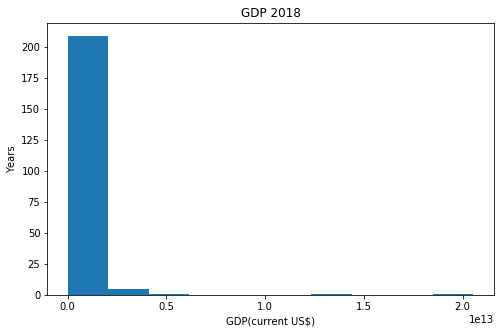

In [757]:
df_gdp['2018'].plot(kind='hist', figsize=(8, 5))

plt.title('GDP 2018')
plt.ylabel('Years')
plt.xlabel('GDP(current US$)')
plt.show()

In [758]:
df_gdp.loc[['United States','Japan','China'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
United States,2.857307e+12,3.207042e+12,3.343789e+12,3.634038e+12,4.037613e+12,4.338979e+12,4.579631e+12,4.855215e+12,5.236438e+12,5.641580e+12,...,1.444893e+13,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752175e+13,1.821930e+13,1.870719e+13,1.948539e+13,2.054434e+13
Japan,1.105386e+12,1.218989e+12,1.134518e+12,1.243324e+12,1.318382e+12,1.398893e+12,2.078953e+12,2.532809e+12,3.071683e+12,3.054914e+12,...,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.389476e+12,4.926667e+12,4.859951e+12,4.971323e+12
China,1.911492e+11,1.958664e+11,2.050897e+11,2.306867e+11,2.599465e+11,3.094880e+11,3.007581e+11,2.729730e+11,3.123536e+11,3.477681e+11,...,5.101702e+12,6.087165e+12,7.551500e+12,8.532231e+12,9.570406e+12,1.043853e+13,1.101554e+13,1.113795e+13,1.214349e+13,1.360815e+13


In [759]:
df_gdp_t = df_gdp.loc[['United States','Japan','China','Korea, Rep.'],years].transpose()
#df_gdp_t.head()

In [761]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    #print(name, hex)

SyntaxError: unexpected EOF while parsing (<ipython-input-761-5c923bace60d>, line 3)

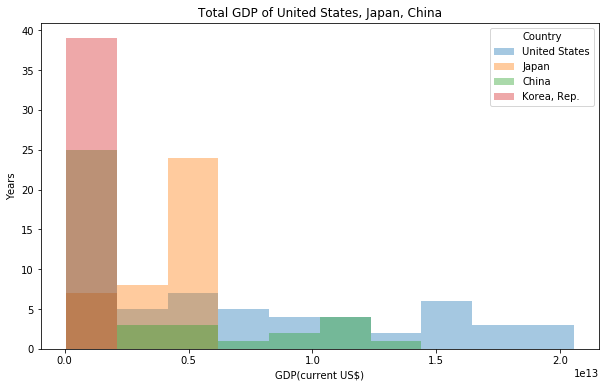

In [762]:
df_gdp_t.plot(kind='hist', figsize=(10,6), alpha=0.4)

plt.title('Total GDP of United States, Japan, China')
plt.ylabel('Years')
plt.xlabel('GDP(current US$)')
plt.show()

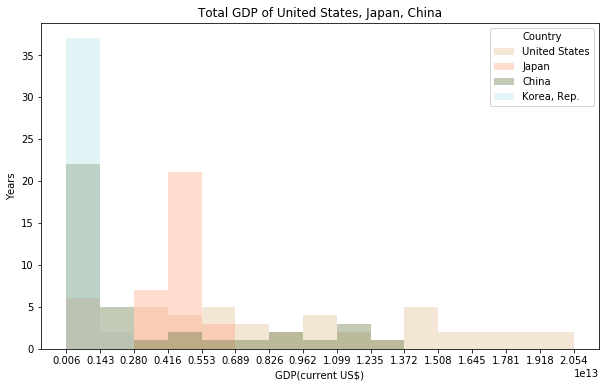

In [763]:
count, bin_edges = np.histogram(df_gdp_t, 15)

df_gdp_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.35,
          xticks=bin_edges,
          color=['#DEB887', '#FFA07A', '#556B2F', '#B0E0E6' ]
         )

plt.title('Total GDP of United States, Japan, China')
plt.ylabel('Years')
plt.xlabel('GDP(current US$)')

plt.show()

In [794]:
df_gdp_korea_rep=df_gdp.loc['Korea, Rep.', years]
df_gdp_korea_rep.head()

1980    6.498082e+10
1981    7.242559e+10
1982    7.777343e+10
1983    8.702443e+10
1984    9.659743e+10
Name: Korea, Rep., dtype: float64

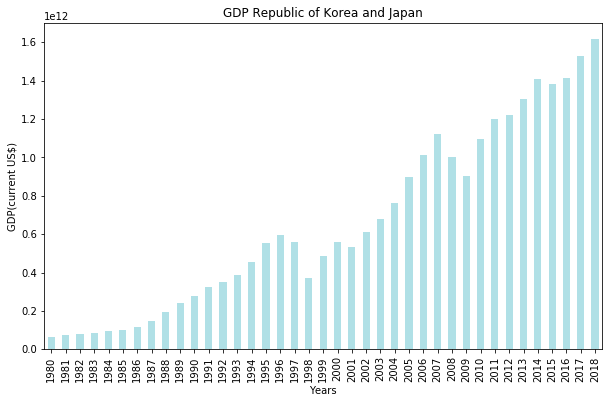

In [796]:
df_gdp_korea_rep.plot(kind='bar', figsize=(10,6), color=('#B0E0E6'))

plt.title('GDP Republic of Korea and Japan')
plt.xlabel('Years')
plt.ylabel('GDP(current US$)')

plt.show()

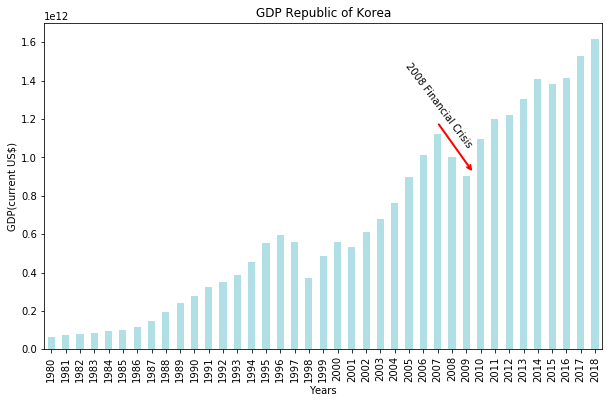

In [797]:
df_gdp_korea_rep.plot(kind='bar', figsize=(10, 6), color='#B0E0E6') 

plt.title('GDP Republic of Korea')
plt.xlabel('Years')
plt.ylabel('GDP(current US$)')

plt.annotate('',                      
             xy=(29.5, 0.92e12),            
             xytext=(27, 1.181e12),         
             xycoords='data', 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
            )

plt.annotate('2008 Financial Crisis', 
             xy=(29.5, 1.04e12),                    
             rotation= -53,                  
             va='bottom',                    
             ha='right',                      
            )

plt.show()

In [809]:
df_gdp.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Country,,,,,,,,,,,,,,,,,,,,,
United States,2.857307e+12,3.207042e+12,3.343789e+12,3.634038e+12,4.037613e+12,4.338979e+12,4.579631e+12,4.855215e+12,5.236438e+12,5.641580e+12,...,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752175e+13,1.821930e+13,1.870719e+13,1.948539e+13,2.054434e+13,4.014048e+14
Japan,1.105386e+12,1.218989e+12,1.134518e+12,1.243324e+12,1.318382e+12,1.398893e+12,2.078953e+12,2.532809e+12,3.071683e+12,3.054914e+12,...,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.389476e+12,4.926667e+12,4.859951e+12,4.971323e+12,1.552889e+14
China,1.911492e+11,1.958664e+11,2.050897e+11,2.306867e+11,2.599465e+11,3.094880e+11,3.007581e+11,2.729730e+11,3.123536e+11,3.477681e+11,...,6.087165e+12,7.551500e+12,8.532231e+12,9.570406e+12,1.043853e+13,1.101554e+13,1.113795e+13,1.214349e+13,1.360815e+13,1.254956e+14
Germany,9.502909e+11,8.004721e+11,7.765764e+11,7.706843e+11,7.251111e+11,7.325349e+11,1.046259e+12,1.298176e+12,1.401233e+12,1.398967e+12,...,3.396354e+12,3.744409e+12,3.527345e+12,3.732743e+12,3.883920e+12,3.360550e+12,3.466790e+12,3.656749e+12,3.947620e+12,9.204184e+13
United Kingdom,5.649477e+11,5.407657e+11,5.150489e+11,4.896180e+11,4.614871e+11,4.892852e+11,6.014527e+11,7.451626e+11,9.101227e+11,9.268848e+11,...,2.475244e+12,2.659310e+12,2.704888e+12,2.786023e+12,3.063803e+12,2.928591e+12,2.694283e+12,2.666229e+12,2.855297e+12,6.758392e+13


In [807]:
df_gdp_top15 = df_gdp.sort_values(['Total'], ascending=False)

df_gdp_top15 = df_gdp['Total'].head(15)
df_gdp_top15

Country
United States         4.014048e+14
Japan                 1.552889e+14
China                 1.254956e+14
Germany               9.204184e+13
United Kingdom        6.758392e+13
France                6.670141e+13
Italy                 5.422818e+13
Brazil                3.861048e+13
Canada                3.631287e+13
India                 3.319013e+13
Spain                 3.141960e+13
Russian Federation    2.894223e+13
Sub-Saharan Africa    2.868206e+13
Korea, Rep.           2.583983e+13
Mexico                2.555793e+13
Name: Total, dtype: float64

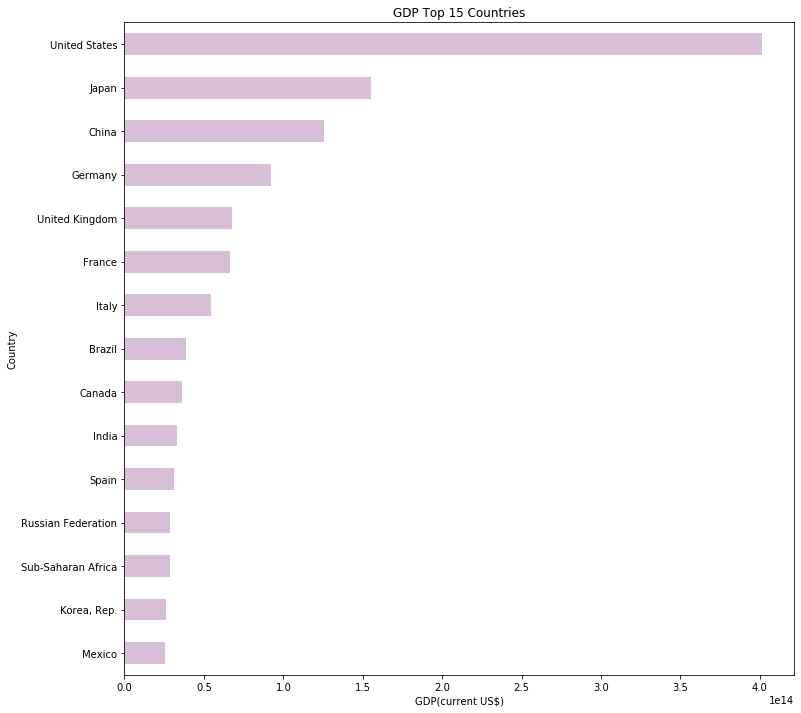

In [810]:
df_gdp_top15.plot(kind='barh', figsize=(12, 12), color='#D8BFD8') 
plt.gca().invert_yaxis()

plt.xlabel('GDP(current US$)')
plt.title('GDP Top 15 Countries')


'''for index, value in enumerate(df_gdp_top15): 
    label = format(int(value), ',')
    
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='black')
'''
plt.show()